# Credit Card Customer Segmentation Project¶

## About Dataset
This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about `9000 active credit card holders` during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

* `CUST_ID` : Identification of Credit Card holder (Categorical)
* `BALANCE` : Balance amount left in their account to make purchases (
* `BALANCE_FREQUENCY` : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* `PURCHASES` : Amount of purchases made from account
* `ONEOFF_PURCHASES` : Maximum purchase amount done in one-go
* `INSTALLMENTS_PURCHASES` : Amount of purchase done in installment
* `CASH_ADVANCE` : Cash in advance given by the user
* `PURCHASES_FREQUENCY` : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* `ONEOFFPURCHASESFREQUENCY` : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* `PURCHASESINSTALLMENTSFREQUENCY` : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* `CASHADVANCEFREQUENCY` : How frequently the cash in advance being paid
* `CASHADVANCETRX` : Number of Transactions made with "Cash in Advanced"
* `PURCHASES_TRX`: Numbe of purchase transactions made
* `CREDIT_LIMIT` : Limit of Credit Card for user
* `PAYMENTS` : Amount of Payment done by user
* `MINIMUM_PAYMENTS` : Minimum amount of payments made by user
* `PRCFULLPAYMENT` : Percent of full payment paid by user
* `TENURE` : Tenure of credit card service for user

## Project Steps


1. **Import Necessary Libraries**
2. **Exploratory Data Analysis**
3. **Data Preprocessing**
4. **Modeling**
5. **Results**
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, Birch, MeanShift, AffinityPropagation
from sklearn.metrics import davies_bouldin_score

## Exploratory Data Analysis (EDA)

In [2]:
data=pd.read_csv('CC GENERAL.csv')

### Checking for Null Values

In [3]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Filling missing values using mean

In [5]:
minmuns=data['MINIMUM_PAYMENTS'].mean()
data['MINIMUM_PAYMENTS'].fillna(value=minmuns,inplace=True)
credit=data['CREDIT_LIMIT'].mean()
data['CREDIT_LIMIT'].fillna(value=credit,inplace=True)

In [6]:
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [8]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Histogram Plots

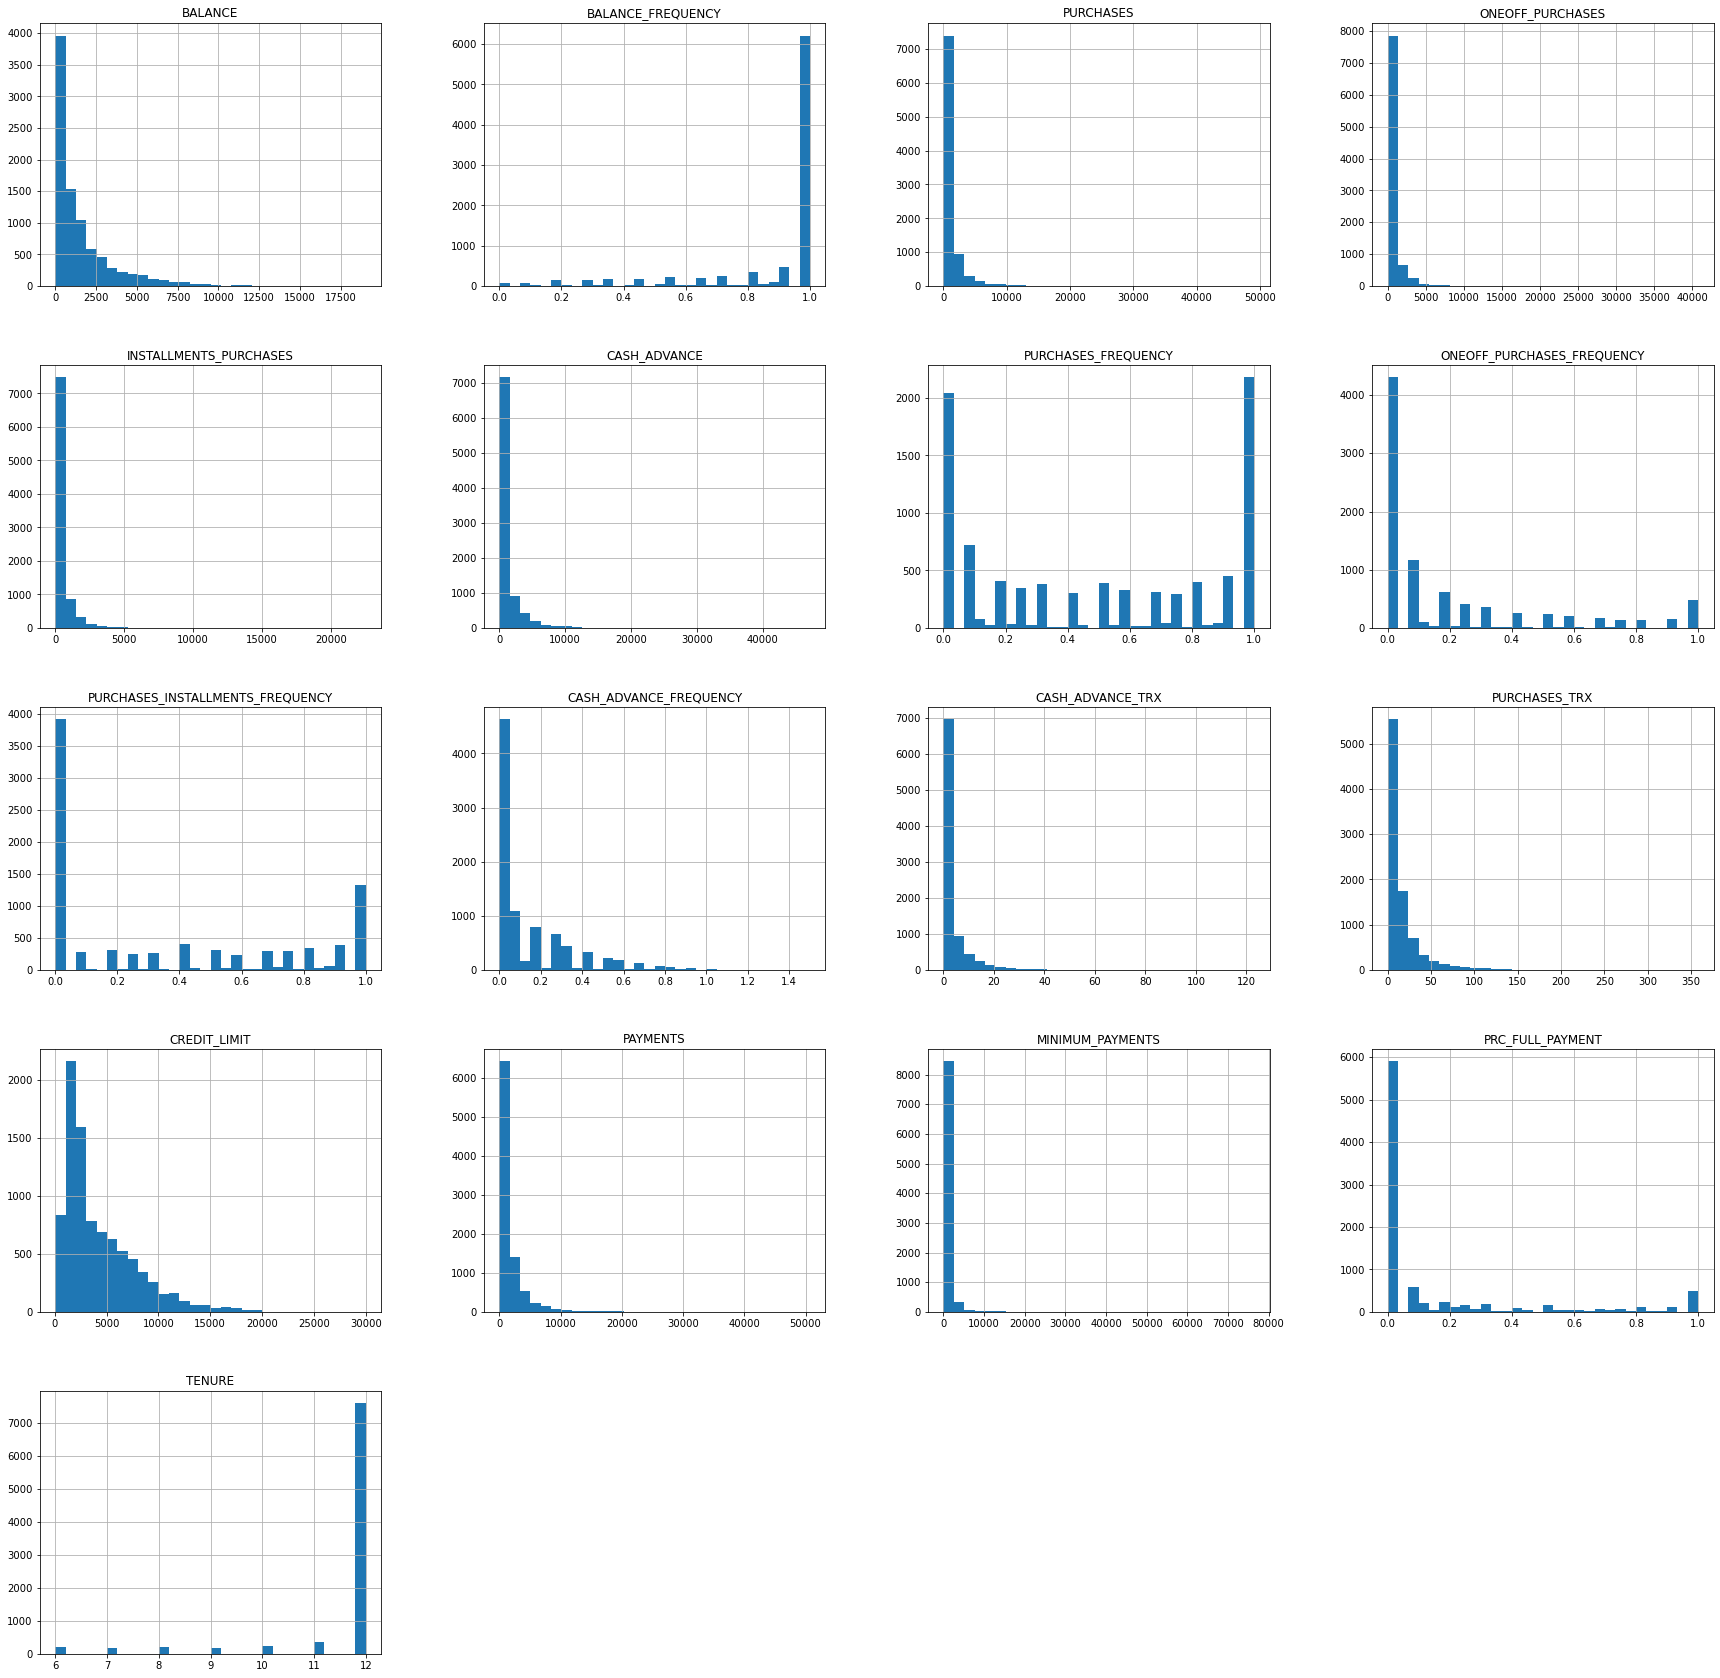

In [9]:
data.hist(figsize=(30,30),bins=30)
plt.show()

## Visualizing the Heat Map

<AxesSubplot:>

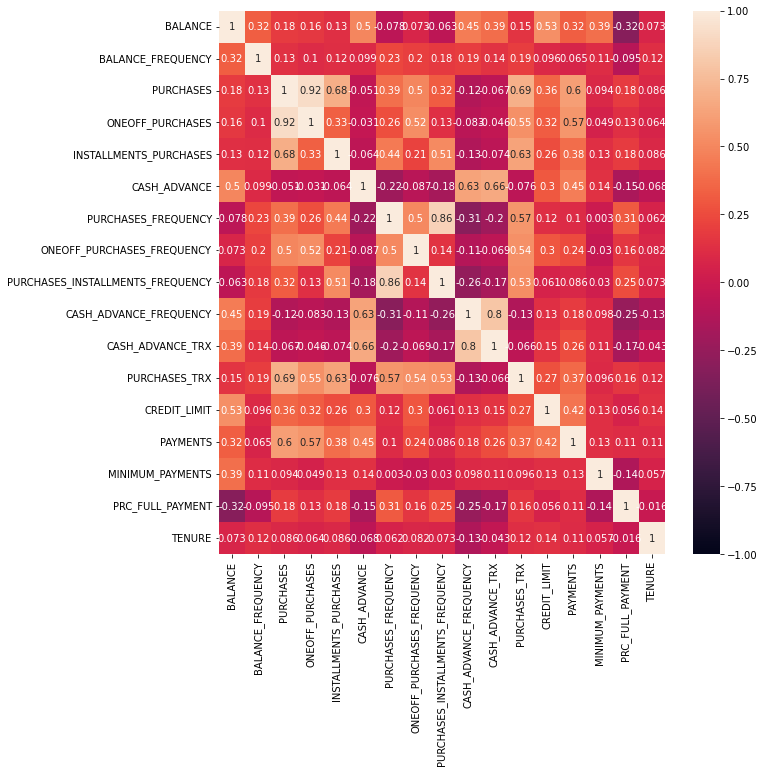

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,vmin = -1, vmax = 1)

## Boxplot visualization of all features

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-p

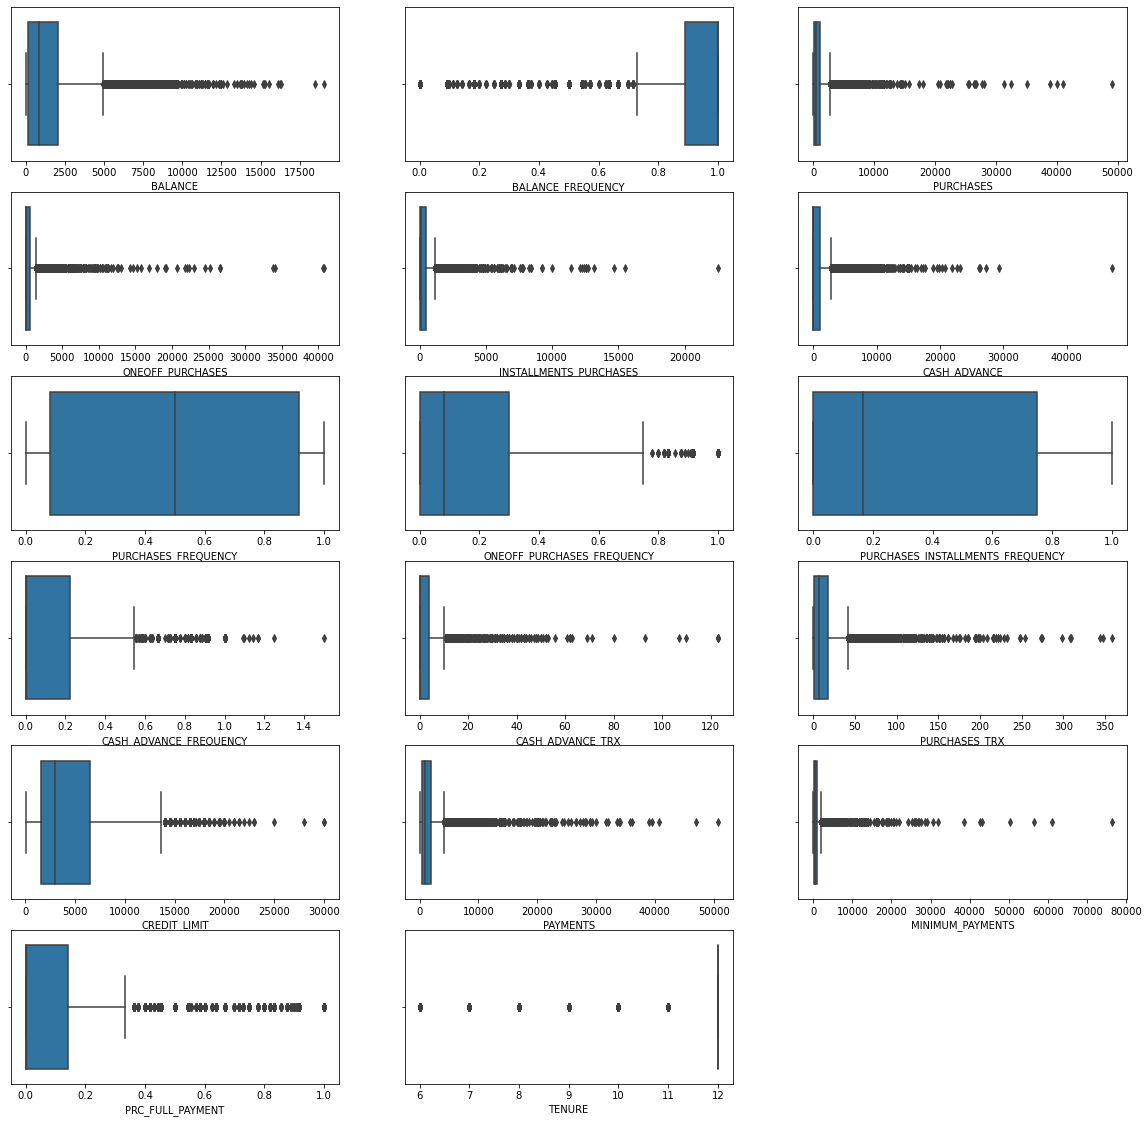

In [11]:
feature=list(data.select_dtypes(include=['float64','int64']).columns)
plt.figure(figsize=(20,30))
x=1
for i in feature:
 
  plt.subplot(9,3,x)
  sns.boxplot(data[i])
  x=x+1

## Distplot visualization of all features

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

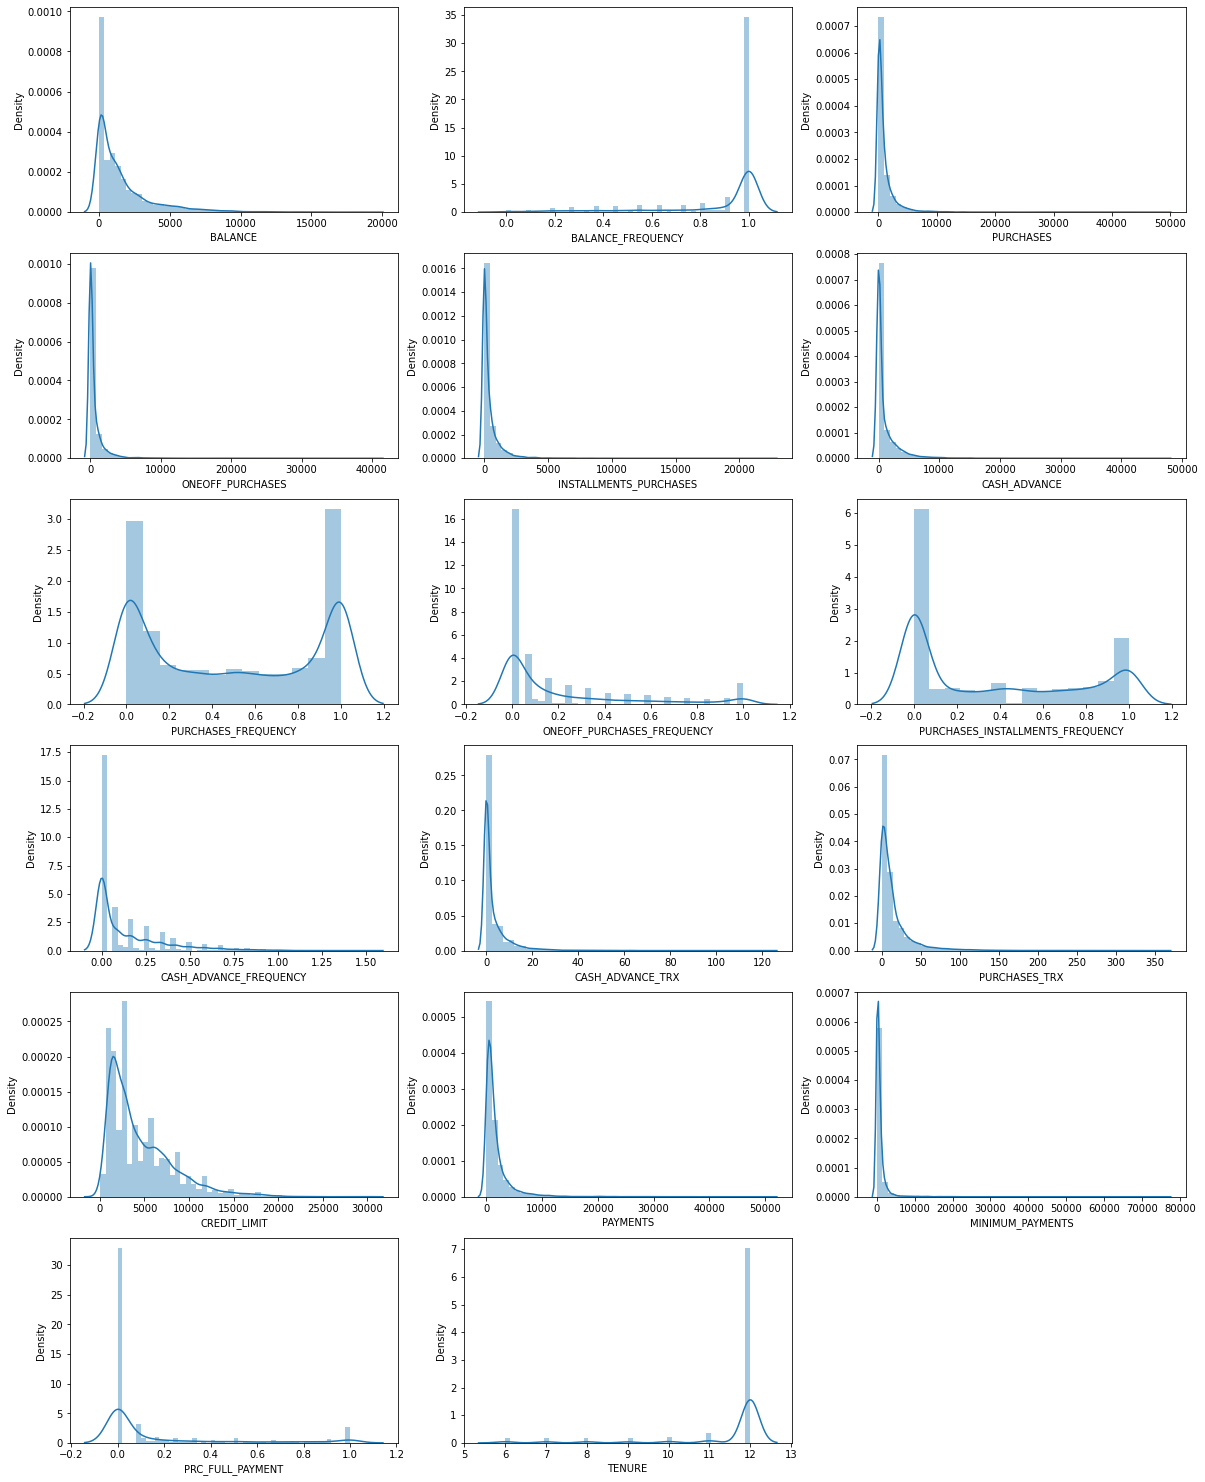

In [12]:
plt.figure(figsize=(20,40))
x=1
for i in feature:
  plt.subplot(9,3,x)
  sns.distplot(data[i])
  x=x+1

In [13]:
data.head(1)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12


### Dropping `CUST_ID` column

In [14]:
data.drop(columns=['CUST_ID'],inplace=True,axis=1)

### Normalization

In [15]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
datacol=data.columns
data_norm=data.copy()
norm = preprocessing.StandardScaler()
data_norm[datacol]=norm.fit_transform(data[datacol])


In [16]:
data_norm

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,-4.390474e-16,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469065e-01,0.329200,-4.122768


---

## K-Means Model

In [17]:
from sklearn import cluster
kmean=cluster.KMeans(n_clusters=5,random_state=42)
kmean.fit(data_norm)

KMeans(n_clusters=5, random_state=42)

intertia>-- 2 127784.87449145076
Silhouette Coefficient for num_cluster>-- 2 0.20950134853896507
intertia>-- 3 111986.74707959313
Silhouette Coefficient for num_cluster>-- 3 0.2505299806322502
intertia>-- 4 99073.93826774818
Silhouette Coefficient for num_cluster>-- 4 0.1976074492720698
intertia>-- 5 91502.98259428905
Silhouette Coefficient for num_cluster>-- 5 0.1931688590154638
intertia>-- 6 84851.13240432602
Silhouette Coefficient for num_cluster>-- 6 0.20259398485856095
intertia>-- 7 79528.79193169226
Silhouette Coefficient for num_cluster>-- 7 0.21436877398647777
intertia>-- 8 74817.38675619151
Silhouette Coefficient for num_cluster>-- 8 0.2185524558994579
intertia>-- 9 69954.20465249014
Silhouette Coefficient for num_cluster>-- 9 0.22605314920897515


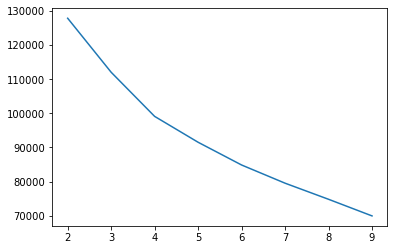

In [18]:
value=[]
import tqdm
from sklearn.metrics import silhouette_score
from sklearn import cluster
silohotte_score_lists={}
for kn in range(2,10):
  model=cluster.KMeans(n_clusters=kn,random_state=42,max_iter=300)
  model.fit(data_norm)
  value.append(model.inertia_)
  print('intertia>--',kn,model.inertia_)
  print("Silhouette Coefficient for num_cluster>--",kn, silhouette_score(data_norm, model.labels_))
plt.plot(range(2, 10), value)
  # plt.plot(range(1, 10),value)

plt.show()
# silohotte_score_lists[kn]=silhouette_score(data_norm,model.labels_)


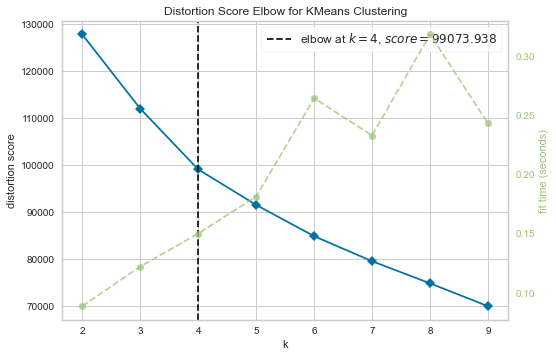

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


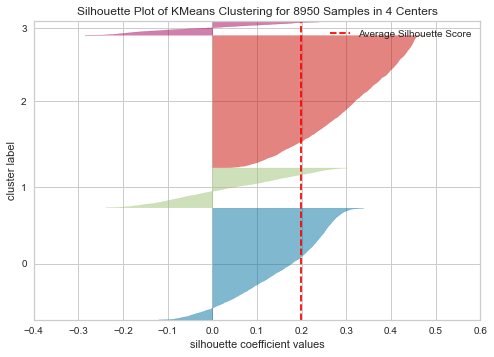

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(data_norm)       
distortion_visualizer.show()   
km_model = cluster.KMeans(distortion_visualizer.elbow_value_, random_state=42)
labels = km_model.fit_predict(data_norm)
from yellowbrick.cluster import SilhouetteVisualizer
labels=km_model.fit_predict(data_norm)
visualizer = SilhouetteVisualizer(km_model, colors='yellowbrick')
visualizer.fit(data_norm,axis=1)
visualizer.show()

In [20]:
km_model.inertia_

99073.93826774818

## DBSCAN Model

In [21]:
eps=np.arange(.1,.8,.1)
min_sample=np.arange(5,13,1)
for ep,mn in zip(eps,min_sample):
  model2=cluster.DBSCAN(eps=ep,min_samples=mn)
  model2.fit(data_norm)
  print('silhoutee sore>-- ',ep,mn,silhouette_score(data_norm,model2.labels_))
  print('davies_bouldin_scor>>--',ep,mn,davies_bouldin_score(data_norm,model2.labels_))

silhoutee sore>--  0.1 5 -0.37480763495802677
davies_bouldin_scor>>-- 0.1 5 1.4955577735577046
silhoutee sore>--  0.2 6 -0.42210546474292315
davies_bouldin_scor>>-- 0.2 6 1.3990301128060096
silhoutee sore>--  0.30000000000000004 7 -0.41962528720413494
davies_bouldin_scor>>-- 0.30000000000000004 7 1.4641569062919586
silhoutee sore>--  0.4 8 -0.37311786811186887
davies_bouldin_scor>>-- 0.4 8 1.599727456058244
silhoutee sore>--  0.5 9 -0.31765746320613075
davies_bouldin_scor>>-- 0.5 9 1.5207306782792769
silhoutee sore>--  0.6 10 -0.3096566990713491
davies_bouldin_scor>>-- 0.6 10 1.6201030142881458
silhoutee sore>--  0.7000000000000001 11 -0.2972836425105018
davies_bouldin_scor>>-- 0.7000000000000001 11 1.7319513691768607


## GMM Model

In [22]:
from sklearn.mixture import GaussianMixture
for n_components in range(2, 11):
    gmm =GaussianMixture(n_components=n_components).fit(data_norm)
    cluster_label=gmm.fit_predict(data_norm)
    sil_coeff = silhouette_score(data_norm,cluster_label, metric='euclidean')
    print("k = {} \t--> \t{}".format(n_components, sil_coeff))
    print('davies_bouldin_scor>---',n_components,davies_bouldin_score(data_norm,cluster_label))

k = 2 	--> 	0.18539433026679242
davies_bouldin_scor>--- 2 2.2854129322217642
k = 3 	--> 	0.11371607734701855
davies_bouldin_scor>--- 3 2.608649706159065
k = 4 	--> 	0.10219678261113994
davies_bouldin_scor>--- 4 2.4069842174872766
k = 5 	--> 	0.08660899508572746
davies_bouldin_scor>--- 5 3.0266491740561934
k = 6 	--> 	0.05627779096240259
davies_bouldin_scor>--- 6 3.0288564179602737
k = 7 	--> 	0.037649966276795455
davies_bouldin_scor>--- 7 2.932499377113163
k = 8 	--> 	0.019041674648471667
davies_bouldin_scor>--- 8 3.783296906758439
k = 9 	--> 	0.03275110171413906
davies_bouldin_scor>--- 9 3.001280446015949
k = 10 	--> 	0.016671810536543583
davies_bouldin_scor>--- 10 3.2729675619887075


### Checking for `Outliers`

In [23]:
def outliers(data):
  Q1=data.quantile(.25)
  Q3=data.quantile(.75)
  IQR=Q3-Q1
  min=Q1-(1.5*IQR)
  max=Q3+(1.5*IQR)
  num_outliers=np.sum((data<min)|(data>max))
  num_total=data.count()
  return(num_outliers/num_total)*100

In [24]:
for col in data.columns:
  data_clean=data[col]
  percent=str(round(outliers(data_clean),2))
  print(f'percent, {col}: {percent}%')

percent, BALANCE: 7.77%
percent, BALANCE_FREQUENCY: 16.68%
percent, PURCHASES: 9.03%
percent, ONEOFF_PURCHASES: 11.32%
percent, INSTALLMENTS_PURCHASES: 9.69%
percent, CASH_ADVANCE: 11.51%
percent, PURCHASES_FREQUENCY: 0.0%
percent, ONEOFF_PURCHASES_FREQUENCY: 8.74%
percent, PURCHASES_INSTALLMENTS_FREQUENCY: 0.0%
percent, CASH_ADVANCE_FREQUENCY: 5.87%
percent, CASH_ADVANCE_TRX: 8.98%
percent, PURCHASES_TRX: 8.56%
percent, CREDIT_LIMIT: 2.77%
percent, PAYMENTS: 9.03%
percent, MINIMUM_PAYMENTS: 8.65%
percent, PRC_FULL_PAYMENT: 16.47%
percent, TENURE: 15.26%


### Removing the `Outliers`

In [25]:
for column in data.columns:
    data_clean = data[column]
    
    Q1 = data_clean.quantile(0.25)
    Q3 = data_clean.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
 
    outliers = ((data_clean < minimum) |(data_clean > maximum))
    data[column].loc[outliers] = np.nan
    
data.isna().sum()

C:\Users\Dell\AppData\Local\Temp\ipykernel_29688\4105637125.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].loc[outliers] = np.nan


BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         248
PAYMENTS                             808
MINIMUM_PAYMENTS                     774
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

#### Using `KNN imputation` to remove the null values

In [26]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
imp_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Standardization

In [27]:
scale=preprocessing.StandardScaler()
d=scale.fit_transform(imp_data)
data_new=pd.DataFrame(d,columns=data.columns)

In [28]:
data_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.936208,-2.648178,-0.768742,-0.667780,-0.453625,-0.648404,-0.806490,-0.744601,-0.707313,-0.747224,-0.681483,-0.780864,-1.057949,-0.990572,-0.847270,-0.449976,0.0
1,1.520938,-1.140739,-0.910671,-0.667780,-0.787864,0.881773,-1.221758,-0.744601,-0.916995,1.029825,0.866732,-0.966454,0.874619,2.899652,1.218588,2.720004,0.0
2,0.971215,0.366700,0.239595,1.573718,-0.787864,-0.648404,1.269843,2.114233,-0.916995,-0.747224,-0.681483,0.147089,1.035667,-0.571493,0.232963,-0.449976,0.0
3,0.327328,0.065213,1.319431,-0.184036,-0.787864,-0.353596,-1.014125,-0.378085,-0.916995,-0.154877,-0.294429,-0.873659,1.035667,-1.191804,0.757653,-0.449976,0.0
4,-0.332474,0.366700,-0.886868,-0.621394,-0.787864,-0.648404,-1.014125,-0.378085,-0.916995,-0.747224,-0.681483,-0.873659,-0.993530,-0.515383,-0.614113,-0.449976,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.945851,0.366700,-0.477564,-0.667780,0.232090,-0.648404,1.269843,-0.744601,1.179833,-0.747224,-0.681483,-0.409683,-1.057949,-0.867128,-1.047966,-0.212228,0.0
8946,-0.953087,0.366700,-0.464353,-0.667780,0.263201,-0.648404,1.269843,-0.744601,1.179833,-0.747224,-0.681483,-0.409683,-1.057949,-0.916721,0.757653,-0.449976,0.0
8947,-0.949810,-2.396946,-0.695843,-0.667780,-0.281951,-0.648404,0.854576,-0.744601,0.760469,-0.747224,-0.681483,-0.502478,-1.057949,-1.110763,-0.973706,3.116255,0.0
8948,-0.957536,-2.396946,-0.910671,-0.667780,-0.787864,-0.596030,-1.221758,-0.744601,-0.916995,0.437478,0.092625,-0.966454,-1.218996,-1.139403,-1.032753,3.116255,0.0


## KMEANS after removing the `outliers`

intertia>-- 2 110961.03227595142
Silhouette Coefficient for num_cluster>-- 2 0.21655905488118282
intertia>-- 3 94744.0753788208
Silhouette Coefficient for num_cluster>-- 3 0.19160271107886445
intertia>-- 4 85353.01842464048
Silhouette Coefficient for num_cluster>-- 4 0.1748424758120135
intertia>-- 5 79772.6927333063
Silhouette Coefficient for num_cluster>-- 5 0.1777378896174347
intertia>-- 6 75006.33125913712
Silhouette Coefficient for num_cluster>-- 6 0.1851376180369285
intertia>-- 7 71124.59147888173
Silhouette Coefficient for num_cluster>-- 7 0.1728638496477215
intertia>-- 8 66903.58880872317
Silhouette Coefficient for num_cluster>-- 8 0.18204225751638006
intertia>-- 9 63649.44199132298
Silhouette Coefficient for num_cluster>-- 9 0.18659863624067377


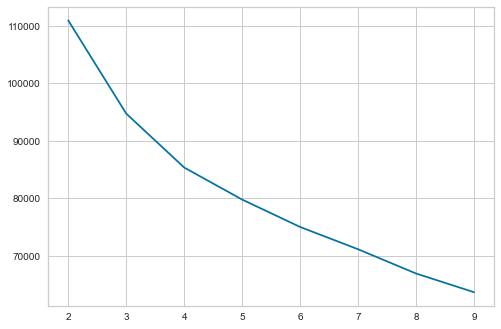

In [29]:
value=[]
import tqdm
from sklearn.metrics import silhouette_score
from sklearn import cluster
silohotte_score_lists={}
for kn in range(2,10):
  model=cluster.KMeans(n_clusters=kn,random_state=42,max_iter=300)
  model.fit(data_new)
  value.append(model.inertia_)
  print('intertia>--',kn,model.inertia_)
  print("Silhouette Coefficient for num_cluster>--",kn, silhouette_score(data_new, model.labels_))
plt.plot(range(2, 10), value)
  # plt.plot(range(1, 10),value)

plt.show()

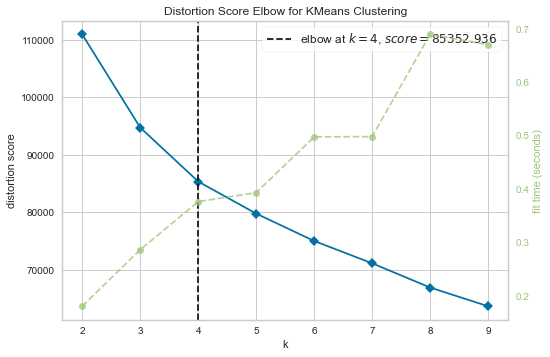

In [30]:
from yellowbrick.cluster import KElbowVisualizer
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(data_new)       
distortion_visualizer.show()   
km_model = cluster.KMeans(distortion_visualizer.elbow_value_, random_state=42)
labels = km_model.fit_predict(data_new)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


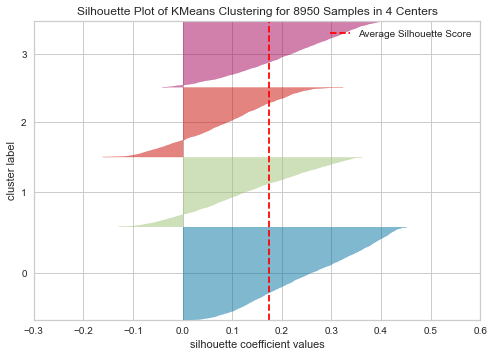

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
from yellowbrick.cluster import SilhouetteVisualizer
labels=km_model.fit_predict(data_new)
visualizer = SilhouetteVisualizer(km_model, colors='yellowbrick')
visualizer.fit(data_new,axis=1)
visualizer.show()

## DBSCAN after removing the `outliers`

In [32]:
eps=np.arange(.1,.8,.1)
min_sample=np.arange(5,13,1)
for ep,mn in zip(eps,min_sample):
  model2=cluster.DBSCAN(eps=ep,min_samples=mn)
  model2.fit(data_new)
  print('silhoutee sore>-- ',ep,mn,silhouette_score(data_new,model2.labels_))
  print('davies_bouldin_scor>>--',ep,mn,davies_bouldin_score(data_new,model2.labels_))

silhoutee sore>--  0.1 5 -0.18414400806854553
davies_bouldin_scor>>-- 0.1 5 1.3341212796303552
silhoutee sore>--  0.2 6 -0.33057527271953596
davies_bouldin_scor>>-- 0.2 6 1.3102249518358866
silhoutee sore>--  0.30000000000000004 7 -0.33101930390374146
davies_bouldin_scor>>-- 0.30000000000000004 7 1.4264526766949792
silhoutee sore>--  0.4 8 -0.28930148493075825
davies_bouldin_scor>>-- 0.4 8 1.4150089825318988
silhoutee sore>--  0.5 9 -0.27176920790804415
davies_bouldin_scor>>-- 0.5 9 1.4766786100344342
silhoutee sore>--  0.6 10 -0.2421120860480725
davies_bouldin_scor>>-- 0.6 10 1.5897278511590263
silhoutee sore>--  0.7000000000000001 11 -0.25636498803479457
davies_bouldin_scor>>-- 0.7000000000000001 11 1.5273949046601183


## GMM after removing the `outliers`

In [33]:
from sklearn.mixture import GaussianMixture
for n_components in range(2, 11):
    gmm =GaussianMixture(n_components=n_components).fit(data_new)
    cluster_label=gmm.fit_predict(data_new)
    sil_coeff = silhouette_score(data_new,cluster_label, metric='euclidean')
    print("k = {} \t--> \t{}".format(n_components, sil_coeff))
    print('davies_bouldin_scor>---',n_components,davies_bouldin_score(data_new,cluster_label))

k = 2 	--> 	0.17500034261268946
davies_bouldin_scor>--- 2 2.033450079686238
k = 3 	--> 	0.12757592963207695
davies_bouldin_scor>--- 3 2.3308761300229865
k = 4 	--> 	0.06939144754154102
davies_bouldin_scor>--- 4 2.201133472256891
k = 5 	--> 	0.038524119650141755
davies_bouldin_scor>--- 5 2.367849362643085
k = 6 	--> 	0.09810392270660473
davies_bouldin_scor>--- 6 2.59367999782719
k = 7 	--> 	0.059841034589618335
davies_bouldin_scor>--- 7 2.977530264771247
k = 8 	--> 	0.05759665853186438
davies_bouldin_scor>--- 8 2.7318074479379684
k = 9 	--> 	0.029307897009677328
davies_bouldin_scor>--- 9 3.129882566783072
k = 10 	--> 	0.06349226386477691
davies_bouldin_scor>--- 10 2.987239578290652


## Final Results

- `The best K`: 3 
- `Slihouette Score`: 0.1275
- `Davies Bouldin Score`: 2.3308